In [17]:
import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Selected device:", device)

torch.manual_seed(42)

Selected device: cuda


In [19]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10('./data',
                                 download = True, train = True, transform = transform)

test_dataset = datasets.CIFAR10('./data',
                                download = True, train = False, transform = transform)

Files already downloaded and verified
Files already downloaded and verified


In [20]:
batch_size = 64

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size,
                                          shuffle=True, num_workers = 0)

testloader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size,
                                         shuffle = False, num_workers = 0)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

In [21]:
class CNNClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 10, 3, padding = 1)
        self.conv2 = nn.Conv2d(10, 10, 3, padding = 1)
        self.conv3 = nn.Conv2d(10, 10, 3, padding = 1)
        self.conv4 = nn.Conv2d(10, 10, 3, padding = 1)
        self.conv5 = nn.Conv2d(10, 10, 3, padding = 1)
        self.conv6 = nn.Conv2d(10, 10, 3, padding = 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(10 * 4* 4, 10) # 32*32 feature map 32개
        self.feature_maps = []

    def forward(self, x):
        self.feature_maps = []
        
        x = F.relu(self.conv1(x))
        self.feature_maps.append(x.detach().cpu())
        x = F.relu(self.conv2(x))
        self.feature_maps.append(x.detach().cpu())
        x= self.pool(x)        
        self.feature_maps.append(x.detach().cpu())
        x = F.relu(self.conv3(x))
        self.feature_maps.append(x.detach().cpu())
        x = F.relu(self.conv4(x))
        self.feature_maps.append(x.detach().cpu())
        x= self.pool(x)
        self.feature_maps.append(x.detach().cpu())
        x = F.relu(self.conv5(x))
        self.feature_maps.append(x.detach().cpu())
        x = F.relu(self.conv6(x))
        self.feature_maps.append(x.detach().cpu())
        x= self.pool(x)
        self.feature_maps.append(x.detach().cpu())
        x = x.view(-1, 10 * 4 * 4)
        x = F.softmax(self.fc(x), dim = 1)
        return x

In [22]:
model = CNNClassifier()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [23]:
def train_model(model, criterion, optimizer, trainloader, num_epochs):
    print("-----Training Started------")
    for epoch in range(num_epochs):
        
        model.train()
        
        running_loss = 0.0
        
        for images, labels in tqdm(trainloader):
            
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(trainloader.dataset)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

        torch.save(model.state_dict(), '/home/june/__github__/study-MLDL/models/Conv_model.pth')
    
    print("-----Training Completed-----")

In [24]:
num_epochs = 16

train_model(model, criterion, optimizer, trainloader, num_epochs)

-----Training Started------


100%|██████████| 782/782 [00:18<00:00, 42.88it/s]


Epoch [1/16], Loss: 2.1629


100%|██████████| 782/782 [00:18<00:00, 42.34it/s]


Epoch [2/16], Loss: 2.1023


100%|██████████| 782/782 [00:18<00:00, 42.65it/s]


Epoch [3/16], Loss: 2.0729


100%|██████████| 782/782 [00:18<00:00, 42.82it/s]


Epoch [4/16], Loss: 2.0495


100%|██████████| 782/782 [00:18<00:00, 42.80it/s]


Epoch [5/16], Loss: 2.0316


100%|██████████| 782/782 [00:18<00:00, 42.75it/s]


Epoch [6/16], Loss: 2.0191


100%|██████████| 782/782 [00:18<00:00, 43.17it/s]


Epoch [7/16], Loss: 2.0071


100%|██████████| 782/782 [00:18<00:00, 42.66it/s]


Epoch [8/16], Loss: 1.9965


100%|██████████| 782/782 [00:18<00:00, 43.03it/s]


Epoch [9/16], Loss: 1.9859


100%|██████████| 782/782 [00:18<00:00, 42.93it/s]


Epoch [10/16], Loss: 1.9795


100%|██████████| 782/782 [00:18<00:00, 42.88it/s]


Epoch [11/16], Loss: 1.9707


100%|██████████| 782/782 [00:18<00:00, 42.31it/s]


Epoch [12/16], Loss: 1.9635


100%|██████████| 782/782 [00:18<00:00, 42.93it/s]


Epoch [13/16], Loss: 1.9567


100%|██████████| 782/782 [00:18<00:00, 42.73it/s]


Epoch [14/16], Loss: 1.9498


100%|██████████| 782/782 [00:18<00:00, 42.77it/s]


Epoch [15/16], Loss: 1.9414


100%|██████████| 782/782 [00:18<00:00, 42.99it/s]

Epoch [16/16], Loss: 1.9340
-----Training Completed-----


In [25]:
def test_model(model, testloader):
    
    model.eval()
    
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in testloader:

            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"Accuracy on test set: {accuracy:.4f}")

In [26]:
test_model(model, testloader)

Accuracy on test set: 0.5142


In [27]:
def visualize_feature_maps(model, input_image):
    model.eval()
    with torch.no_grad():
        model(input_image)

    plt.figure(figsize=(10, 10))
    plt.subplot(10, 10, 1)
    plt.imshow(input_image.permute(1, 2, 0))
    plt.title('Original Image', fontsize = 5)
    plt.axis('off')
    
    for i, fmaps in enumerate(model.feature_maps, 1):
        for j, fmap in enumerate(fmaps, 1):
            plt.subplot(10, 10, 10*i + j)
            plt.imshow(fmap.squeeze().cpu().numpy(), cmap='viridis')
            plt.title(f'Layer {i} Feature Map', fontsize = 5)
            plt.axis('off')
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


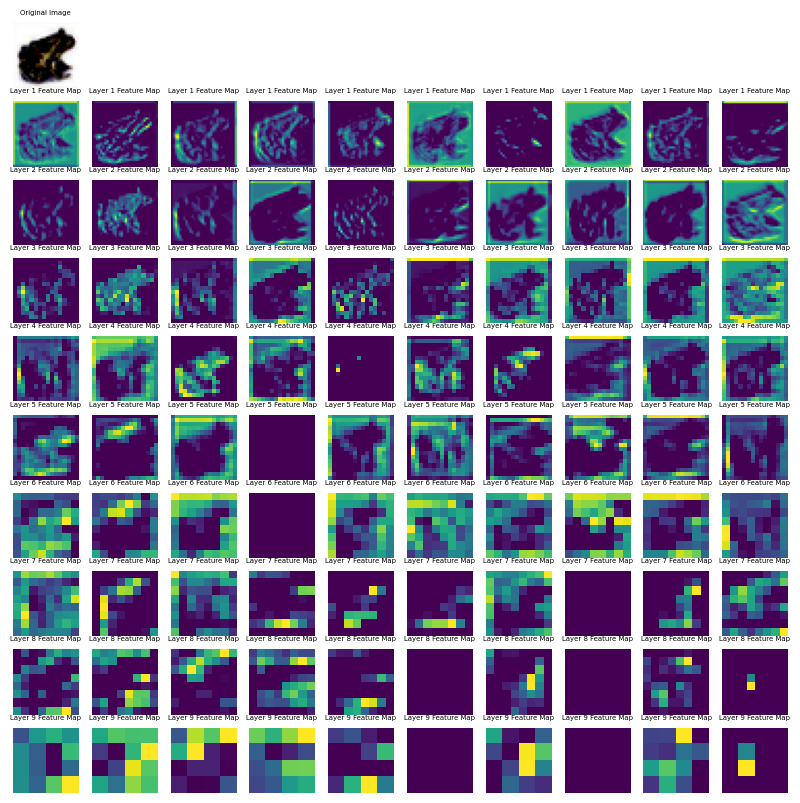

In [28]:
model = CNNClassifier()
model.load_state_dict(torch.load('/home/june/__github__/study-MLDL/models/Conv_model.pth'))

for i in np.random.randint(0, 10000, size=1):
    example_image, example_label = test_dataset[i]
    visualize_feature_maps(model, example_image)

In [29]:
def visualize_weights(model):
    plt.figure(figsize=(10, 5))
    layers = list(model.children())
    for idx, layer in enumerate(layers):
        if isinstance(layer, nn.Conv2d):
            weights = layer.weight.data.cpu().numpy()
            num_filters = weights.shape[0]
            for i in range(num_filters):
                plt.subplot(len(layers), num_filters, idx * num_filters + i + 1)
                plt.imshow(weights[i, 0], cmap='gray')
                plt.axis('off')
                plt.title(f'Layer {idx+1}, Kernel {i+1}', fontsize = 5)
    plt.tight_layout()
    plt.show()

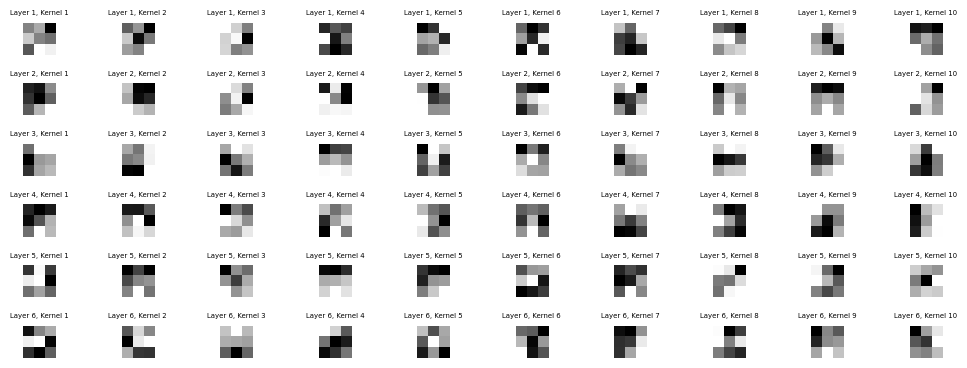

In [30]:
# 모델의 각 컨볼루션 레이어의 가중치를 시각화합니다.
visualize_weights(model)